In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("apple_products.csv")


In [32]:
print(df.describe())

          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.000000     4.600000  
75%     

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB
None


In [2]:
# Cleaning currency columns
df['Sale Price'] = df['Sale Price'].replace('[₹,]', '', regex=True).astype(float)
df['Mrp'] = df['Mrp'].replace('[₹,]', '', regex=True).astype(float)

# Convert others to numeric
df['Number Of Ratings'] = pd.to_numeric(df['Number Of Ratings'], errors='coerce')
df['Number Of Reviews'] = pd.to_numeric(df['Number Of Reviews'], errors='coerce')
df['Discount Percentage'] = pd.to_numeric(df['Discount Percentage'], errors='coerce')
df['Star Rating'] = pd.to_numeric(df['Star Rating'], errors='coerce')

# Check nulls
print(df.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


In [3]:
#feature engineering
df['Computed Discount %'] = round(((df['Mrp'] - df['Sale Price']) / df['Mrp']) * 100, 2)
df['Engagement Score'] = df['Number Of Ratings'] + df['Number Of Reviews']
df['Is Premium'] = df['Sale Price'].apply(lambda x: 1 if x > 90000 else 0)
df['Popularity Bucket'] = pd.qcut(df['Engagement Score'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

df.head()


,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram,Computed Discount %,Engagement Score,Is Premium,Popularity Bucket
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900.0,49900.0,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB,0.0,3787,0,High
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900.0,84900.0,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB,0.0,3787,0,High
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900.0,84900.0,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB,0.0,3787,0,High
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000.0,77000.0,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB,0.0,11996,0,High
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000.0,77000.0,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB,0.0,11996,0,High


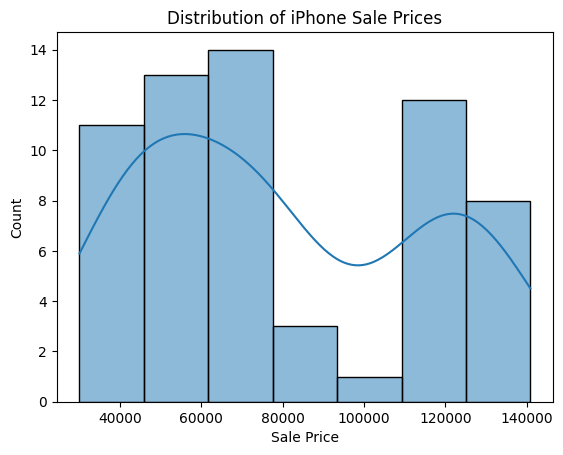

In [4]:
#price distribution
sns.histplot(df['Sale Price'], kde=True)
plt.title("Distribution of iPhone Sale Prices")
plt.show()


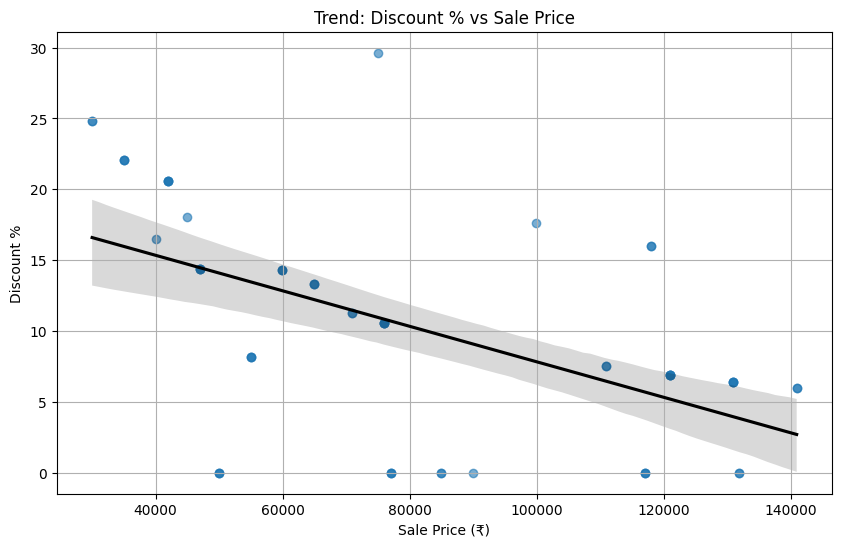

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Sale Price',
    y='Computed Discount %',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'black'},
    ci=95
)

plt.title("Trend: Discount % vs Sale Price")
plt.xlabel("Sale Price (₹)")
plt.ylabel("Discount %")
plt.grid(True)
plt.show()
# A downward-sloping line, if expensive iPhones tend to have lower discounts.

# The scatter points show individual iPhones, and the line gives the overall linear trend.

# The shaded region around the line is the 95% confidence interval.

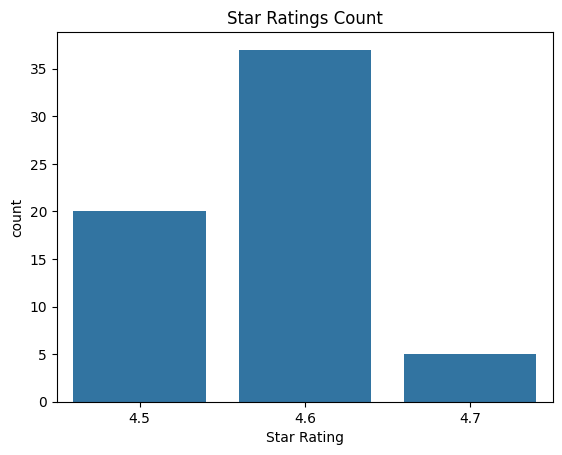

In [10]:
#rating
sns.countplot(x='Star Rating', data=df)
plt.title("Star Ratings Count")
plt.show()

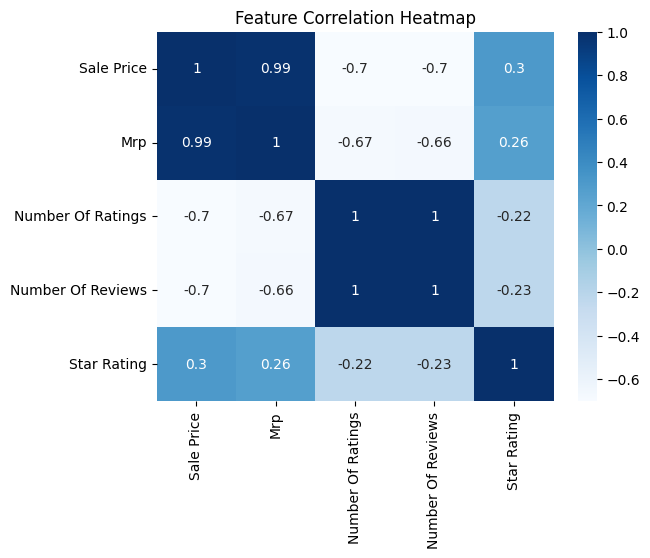

In [35]:
corr = df[['Sale Price', 'Mrp', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
highest_rated = df.sort_values(by=["Star Rating"],ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated['Product Name'])

15                APPLE iPhone 11 Pro Max (Gold, 64 GB)
20      APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17          APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16     APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
14               APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                     APPLE iPhone 8 Plus (Gold, 64 GB)
12    Apple iPhone XR (Black, 128 GB) (Includes EarP...
11    Apple iPhone XR (Coral, 128 GB) (Includes EarP...
9     Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...
1              APPLE iPhone 8 Plus (Space Grey, 256 GB)
Name: Product Name, dtype: object


In [29]:
import plotly.express as px
import plotly.graph_objects as go
iphones = highest_rated["Product Name"].value_counts()
label = iphones.index
counts = highest_rated["Number Of Ratings"]
figure = px.bar(highest_rated, x=label,
                y = counts,
            title="Number of Ratings of Highest Rated iPhones")
figure.show()

In [38]:
figure = px.scatter(data_frame = df, x="Number Of Ratings",
                    y="Sale Price", size="Discount Percentage",
                    trendline="ols",
                    title="Relationship between Sale Price and Number of Ratings of iPhones")
figure.show()


In [40]:
figure = px.scatter(data_frame = df, x="Number Of Ratings",
                    y="Discount Percentage", size="Sale Price",
                    trendline="ols",
                    title="Relationship between Discount Percentage and Number of Ratings of iPhones")
figure.show()

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume df is your dataframe with the columns you gave

# Clean Ram column if needed
def extract_gb(value):
    try:
        return float(str(value).split()[0])
    except:
        return 0

df['Ram'] = df['Ram'].apply(extract_gb)

# Drop missing values
df.dropna(inplace=True)

# Features and target
features = ['Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating', 'Ram']
X = df[features]
y = df['Sale Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


✅ Model Evaluation:
Mean Squared Error: 5680040.43
R² Score: 1.00


In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with columns cleaned and 'Ram' numeric

features = ['Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating', 'Ram']
X = df[features]
y = df['Sale Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


XGBoost Model Evaluation:
Mean Squared Error: 9974.43
R² Score: 1.00


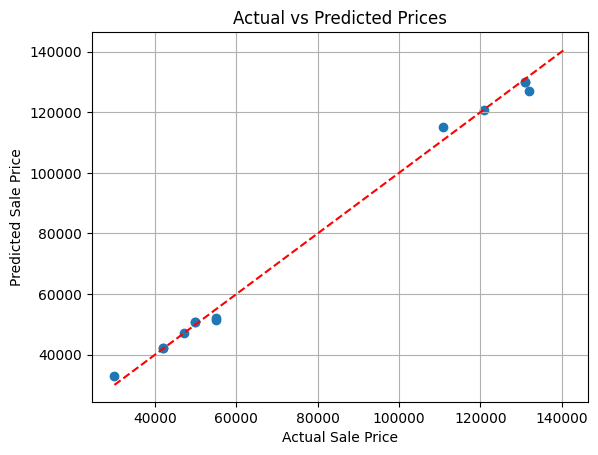

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.grid()
plt.show()
